<a href="https://colab.research.google.com/github/isadorasfelix/imersao-python-alura/blob/main/Imers%C3%A3o_Python_Plotando_Varia%C3%A7%C3%B5es_de__A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mplfinance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [4]:
dados.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
dados.columns = ['abertura', 'maximo', 'minimo', 'fechamento', 'ajuste_fechamento', 'volume']

In [6]:
dados = dados.rename_axis('Data')

In [7]:
dados

,abertura,maximo,minimo,fechamento,ajuste_fechamento,volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


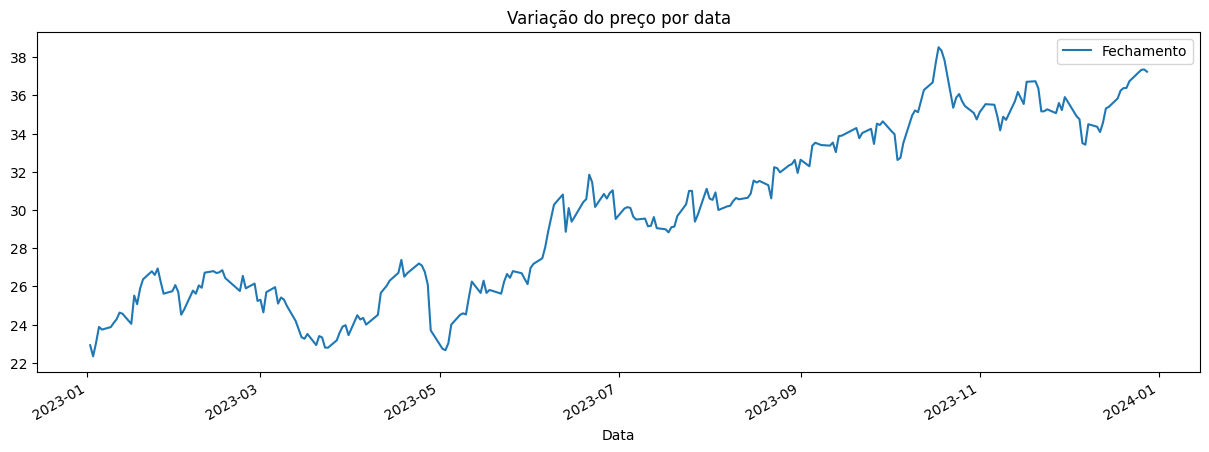

In [8]:
dados['fechamento'].plot(figsize=(15,5))
plt.title('Variação do preço por data', fontsize=12)
plt.legend(['Fechamento'])

In [9]:
df = dados.head(60).copy()

# Convertendo o índice em uma coluna de data
df['data'] = df.index

# Convertendo as datas para o formato numérico de matplotlib - necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['data'] = df['data'].apply(mdates.date2num)

df

,abertura,maximo,minimo,fechamento,ajuste_fechamento,volume,data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443508,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613497,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760302,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030733,58130000,19369.0


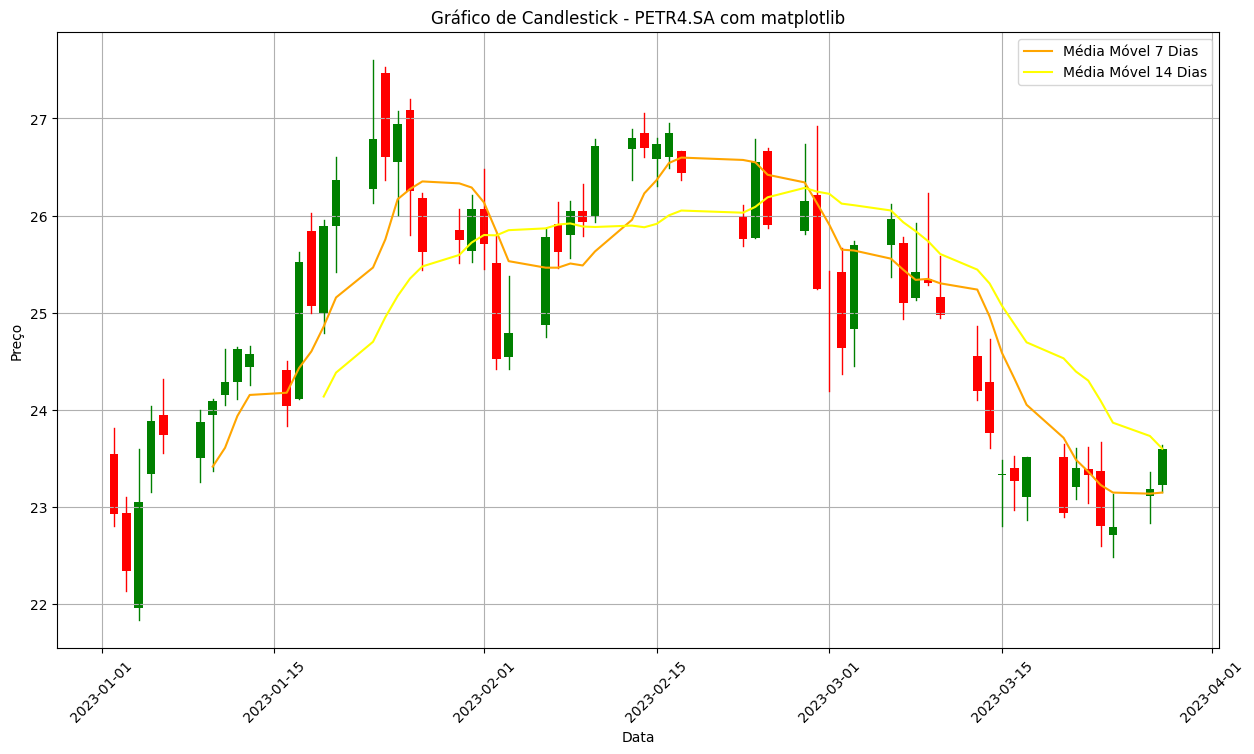

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))

# Vamos definir a largura dos candles no gráfico
width = 0.7

for i in range(len(df)):
    # Determinando a cor do candle
    # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
    # Se for menor, o candle é vermelho (a ação desvalorizou).
    if df['fechamento'].iloc[i] > df['abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df['data'].iloc[i], df['data'].iloc[i]],
            [df['minimo'].iloc[i], df['maximo'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df['data'].iloc[i] - width/2, min(df['abertura'].iloc[i], df['fechamento'].iloc[i])),
                               width,
                               abs(df['fechamento'].iloc[i] - df['abertura'].iloc[i]),
                               facecolor=color))

df['MA7'] = df['fechamento'].rolling(window=7).mean()
df['MA14'] = df['fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df['data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

## Pesquisas via ChatGPT para auxiliar a leitura e entendimento do código:

Analisando em detalhes a linha que adiciona um retângulo no gráfico, representando o candlestick:

```python
ax.add_patch(plt.Rectangle((df['data'].iloc[i] - width/2, min(df['abertura'].iloc[i], df['fechamento'].iloc[i])),
                           width,
                           abs(df['fechamento'].iloc[i] - df['abertura'].iloc[i]),
                           facecolor=color))
```

Vamos dividir isso em partes:

1. **`ax.add_patch()`**: Este método é usado para adicionar formas geométricas, como retângulos, círculos, etc., ao gráfico. Neste caso, estamos adicionando um retângulo.

2. **`plt.Rectangle()`**: Este é um método para criar um objeto de retângulo. Ele precisa de quatro argumentos:
   - **`(x, y)`**: As coordenadas `(x, y)` do canto inferior esquerdo do retângulo.
   - **`width`**: A largura do retângulo.
   - **`height`**: A altura do retângulo.
   - **`facecolor`**: A cor do preenchimento do retângulo.

3. **`df['data'].iloc[i] - width/2`**: Este é o componente `x` do canto inferior esquerdo do retângulo. Está sendo calculado subtraindo metade da largura (`width/2`) da posição `x` do centro do retângulo, que é representado pela data do candle atual.

4. **`min(df['abertura'].iloc[i], df['fechamento'].iloc[i])`**: Este é o componente `y` do canto inferior esquerdo do retângulo. Está sendo calculado como o menor valor entre os preços de abertura e fechamento do candle atual. Isso é feito para garantir que o retângulo represente corretamente a altura do candle, independentemente de ele ter se movido para cima ou para baixo durante o período.

5. **`width`**: Este é o parâmetro que define a largura do retângulo. No contexto dos candles, isso representa o período de tempo que o candle cobre.

6. **`abs(df['fechamento'].iloc[i] - df['abertura'].iloc[i])`**: Este é o parâmetro que define a altura do retângulo, que é a diferença absoluta entre os preços de fechamento e abertura do candle atual. Isso representa a variação do preço durante o período do candle.

7. **`facecolor=color`**: Este parâmetro define a cor de preenchimento do retângulo, que foi determinada anteriormente com base na relação entre os preços de fechamento e abertura. Se o preço de fechamento for maior que o de abertura, a cor será verde (`'green'`); caso contrário, será vermelha (`'red'`).

Destrinchando o código passo a passo:

1. **Criação da figura e dos eixos**:
   ```python
   fig, ax = plt.subplots(figsize=(15, 8))
   ```
   Aqui, uma figura (`fig`) e um conjunto de eixos (`ax`) são criados para o gráfico. O parâmetro `figsize=(15, 8)` define o tamanho da figura como 15 unidades de largura por 8 unidades de altura.

2. **Loop para desenhar os candles**:
   ```python
   for i in range(len(df)):
   ```
   Este loop percorre o DataFrame `df`, onde os dados estão armazenados, para cada linha (candle) no gráfico.

3. **Determinação da cor do candle**:
   ```python
   if df['fechamento'].iloc[i] > df['abertura'].iloc[i]:
       color = 'green'
   else:
       color = 'red'
   ```
   Aqui, é verificado se o preço de fechamento é maior que o de abertura. Se for, o candle será verde; caso contrário, será vermelho.

4. **Desenho do candlestick**:
   ```python
   ax.add_patch(plt.Rectangle((df['data'].iloc[i] - width/2, min(df['abertura'].iloc[i], df['fechamento'].iloc[i])),
                              width,
                              abs(df['fechamento'].iloc[i] - df['abertura'].iloc[i]),
                              facecolor=color))
   ```
   Isso desenha um retângulo representando o candlestick no gráfico. O retângulo é posicionado horizontalmente na data do candle e verticalmente entre os preços de abertura e fechamento. A cor do retângulo é determinada pela variável `color`.

5. **Cálculo e plotagem das médias móveis**:
   ```python
   df['MA7'] = df['fechamento'].rolling(window=7).mean()
   df['MA14'] = df['fechamento'].rolling(window=14).mean()
   ax.plot(df['data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')
   ax.plot(df['data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')
   ```
   Aqui, são calculadas e plotadas as médias móveis de 7 e 14 dias dos preços de fechamento das ações.

6. **Configuração do eixo x para datas**:
   ```python
   ax.xaxis_date()
   ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
   plt.xticks(rotation=45)
   ```
   Isso configura o eixo x para mostrar datas e formata adequadamente essas datas para melhor legibilidade. O método `xaxis_date()` é usado para indicar que as datas estão sendo usadas no eixo x.

7. **Adição de título, rótulos e legenda**:
   ```python
   plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
   plt.xlabel("Data")
   plt.ylabel("Preço")
   ax.legend()
   ```
   Define o título do gráfico, rótulos dos eixos e adiciona uma legenda para as médias móveis.

8. **Adição de grade no gráfico**:
   ```python
   plt.grid(True)
   ```
   Isso adiciona uma grade para facilitar a visualização dos valores.

9. **Exibição do gráfico**:
   ```python
   plt.show()
   ```
   Finalmente, isso exibe o gráfico na tela.

In [11]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['abertura'],
                             high=df['maximo'],
                             low=df['minimo'],
                             close=df['fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['volume'],
                     name='volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

Vamos analisar o código passo a passo:

1. **Criação dos subplots**:
   ```python
   fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                       vertical_spacing=0.1,
                       subplot_titles=('Candlesticks', 'Volume Transacionado'),
                       row_width=[0.2, 0.7])
   ```
   Aqui, estamos usando a função `make_subplots` para criar uma figura (`fig`) com dois subplots empilhados verticalmente. Os parâmetros definem:
   - `rows=2` e `cols=1`: Indicam que queremos dois subplots em uma única coluna.
   - `shared_xaxes=True`: Indica que os subplots compartilharão o mesmo eixo x.
   - `vertical_spacing=0.1`: Define o espaçamento vertical entre os subplots.
   - `subplot_titles=('Candlesticks', 'Volume Transacionado')`: Define os títulos dos subplots.
   - `row_width=[0.2, 0.7]`: Define a largura relativa de cada linha de subplot (primeira linha 20%, segunda linha 70%).

2. **Adição do gráfico de candlestick**:
   ```python
   fig.add_trace(go.Candlestick(x=df.index,
                                open=df['Abertura'],
                                high=df['Maximo'],
                                low=df['Minimo'],
                                close=df['Fechamento'],
                                name='Candlestick'),
                                row=1, col=1)
   ```
   Isso adiciona um gráfico de candlestick ao primeiro subplot. Estamos usando a função `add_trace` para adicionar o gráfico ao subplot especificado (`row=1, col=1`). Os parâmetros fornecem os dados necessários para o gráfico de candlestick: preços de abertura, fechamento, máximo, mínimo, eixo x (datas) e um nome para a legenda.

3. **Adição das médias móveis ao gráfico de candlestick**:
   ```python
   fig.add_trace(go.Scatter(x=df.index,
                            y=df['MA7'],
                            mode='lines',
                            name='MA7 - Média Móvel 7 Dias'),
                            row=1, col=1)
   
   fig.add_trace(go.Scatter(x=df.index,
                            y=df['MA14'],
                            mode='lines',
                            name='MA14 - Média Móvel 14 Dias'),
                            row=1, col=1)
   ```
   Estas linhas adicionam duas linhas (médias móveis de 7 e 14 dias) ao mesmo subplot do gráfico de candlestick. Novamente, estamos usando a função `add_trace` para adicionar essas linhas.

4. **Adição do gráfico de barras para o volume**:
   ```python
   fig.add_trace(go.Bar(x=df.index,
                        y=df['Volume'],
                        name='Volume'),
                        row=2, col=1)
   ```
   Isso adiciona um gráfico de barras representando o volume de transações ao segundo subplot. Estamos usando a função `add_trace` e especificando o subplot (`row=2, col=1`).

5. **Atualização do layout**:
   ```python
   fig.update_layout(yaxis_title='Preço',
                     xaxis_rangeslider_visible=False,  # Desativa o range slider
                     width=1100, height=600)
   ```
   Aqui, estamos atualizando o layout da figura. Definimos o título do eixo y como "Preço", desativamos o range slider do eixo x e ajustamos a largura e altura da figura.

6. **Exibição do gráfico**:
   ```python
   fig.show()
   ```
   Finalmente, exibimos a figura com os subplots usando o método `show()`. Isso mostra o gráfico na tela.

In [12]:
acoesApple = yf.download('AAPL', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


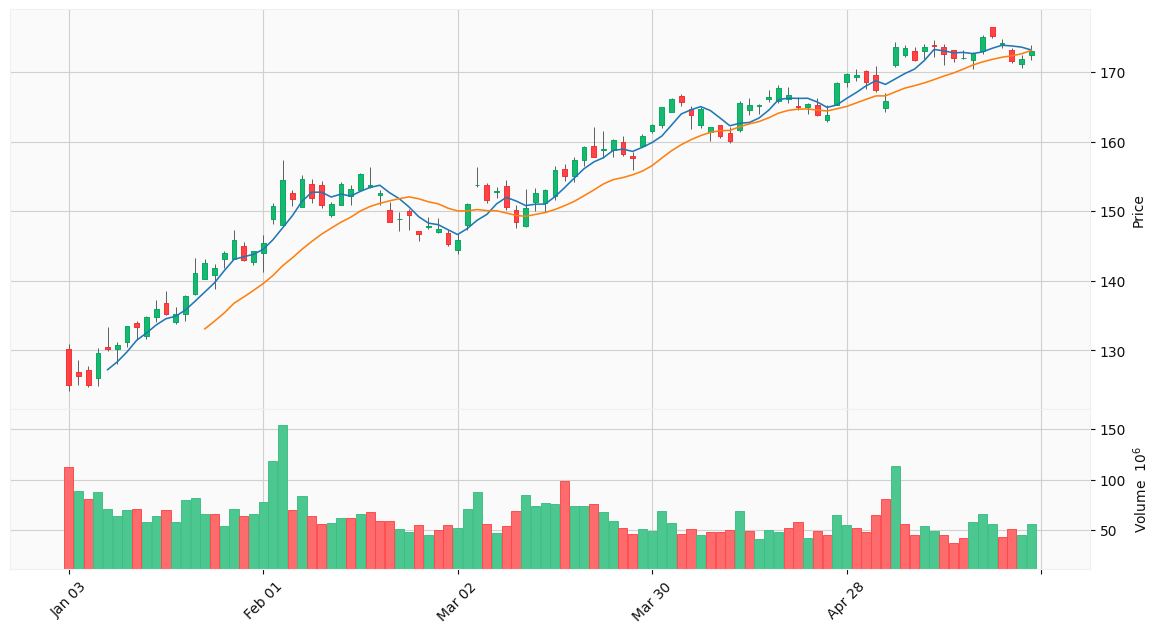

In [13]:
mpf.plot(acoesApple.head(100), type='candle', figsize = (15,8), volume=True, mav=(5,15), style='yahoo')

In [14]:
acoesApple.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [15]:
acoesApple.columns = ['abertura', 'maximo', 'minimo', 'fechamento', 'ajuste_fechamento', 'volume']

In [16]:
acoesApple = acoesApple.rename_axis('Data')
acoesApple

,abertura,maximo,minimo,fechamento,ajuste_fechamento,volume
Data,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166634,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [17]:
df = acoesApple.head(60).copy()

# Convertendo o índice em uma coluna de data
df['data'] = df.index

# Convertendo as datas para o formato numérico de matplotlib - necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['data'] = df['data'].apply(mdates.date2num)

df

,abertura,maximo,minimo,fechamento,ajuste_fechamento,volume,data
Data,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500,19360.0
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600,19361.0
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166634,80962700,19362.0
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700,19363.0
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800,19366.0
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.837662,63896200,19367.0
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.578857,69458900,19368.0
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.499405,71379600,19369.0
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.840149,57809700,19370.0


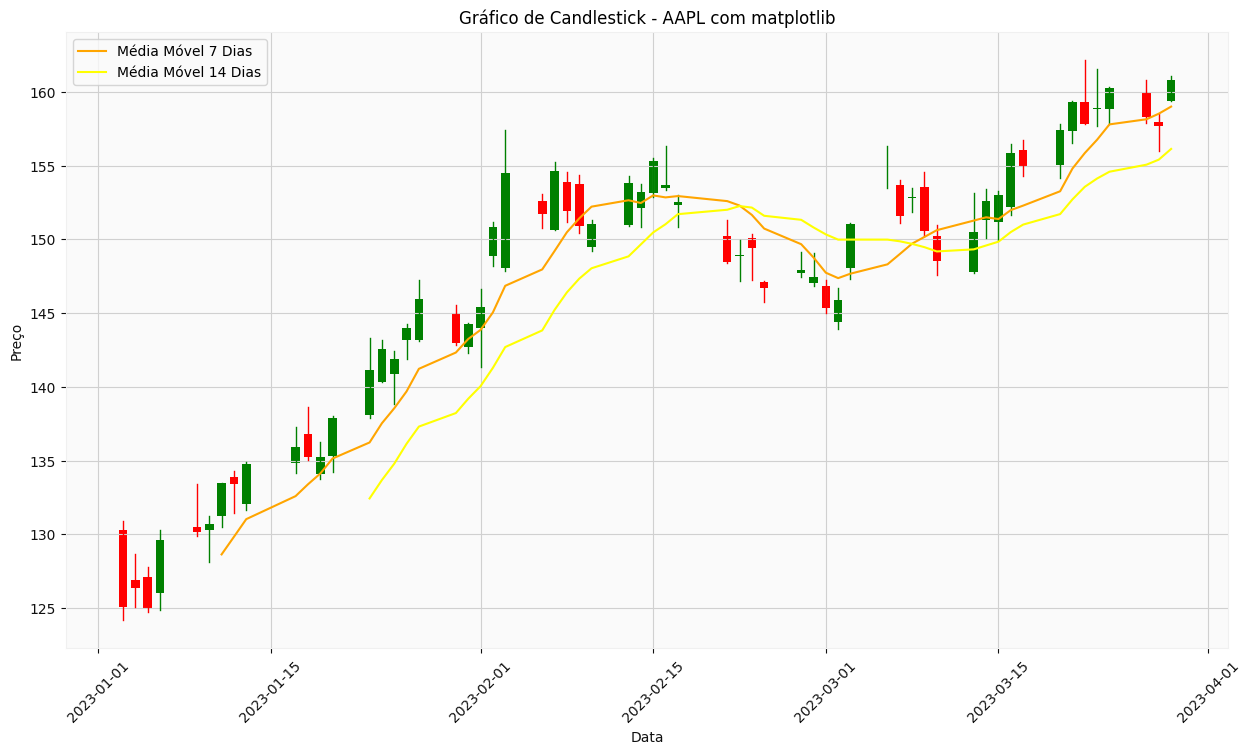

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))

# Vamos definir a largura dos candles no gráfico
width = 0.7

for i in range(len(df)):
    # Determinando a cor do candle
    # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
    # Se for menor, o candle é vermelho (a ação desvalorizou).
    if df['fechamento'].iloc[i] > df['abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df['data'].iloc[i], df['data'].iloc[i]],
            [df['minimo'].iloc[i], df['maximo'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df['data'].iloc[i] - width/2, min(df['abertura'].iloc[i], df['fechamento'].iloc[i])),
                               width,
                               abs(df['fechamento'].iloc[i] - df['abertura'].iloc[i]),
                               facecolor=color))

df['MA7'] = df['fechamento'].rolling(window=7).mean()
df['MA14'] = df['fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df['data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - AAPL com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [21]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['abertura'],
                             high=df['maximo'],
                             low=df['minimo'],
                             close=df['fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['volume'],
                     name='volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1200, height=600)

# Mostrando o gráfico
fig.show()